## Getting your data!

In [14]:
import os
import fun
import pandas as pd
import warnings
import numpy as np
from function import kmean
warnings.filterwarnings('ignore')

dir = '../data/csv/'
files = os.listdir(dir)
if (len(files) < 3) :
    fun.downloadcsv()
files.remove('tr.txt')
df1 = pd.read_csv(dir+files[0])
df2 = pd.read_csv(dir+files[1])
df3 = pd.read_csv(dir+files[2])


In [15]:
dataset = pd.merge(df1, df2, on='track_id', how='inner')
dataset = pd.merge(dataset, df3, on='track_id', how='inner')
print(dataset.shape, df1.shape, df2.shape, df3.shape)

(13129, 820) (13129, 250) (106574, 53) (106574, 519)


## Q2.2

In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
dataset_all = dataset.copy()
for col in dataset_all.columns.values:
    #columns with non-numeric values
    if dataset_all[col].dtype == object :
        #replace missing values by 'None'
        dataset_all[col].fillna("None", inplace = True)
        le = preprocessing.LabelEncoder()
        dataset_all[col]= le.fit_transform(dataset_all[col])
    elif dataset_all[col].dtype == float :
        #replace missing values by 0.
        dataset_all[col].fillna(0., inplace = True)
    elif dataset_all[col].dtype == int:
        #replace missing values by 0
        dataset_all[col].fillna(0, inplace = True)

dataset_Num = dataset[dataset.T[dataset.dtypes!=np.object].index]

In [17]:
def reduc07(dataset):
    for n in range(len(dataset)):
        pca = PCA(n_components=n)
        x = StandardScaler().fit_transform(dataset[dataset.columns.values])
        principalComponents = pca.fit_transform(x)
        principalDf = pd.DataFrame(data = principalComponents)
        if sum(pca.explained_variance_ratio_) < .7:
            continue
        return principalDf

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# find .7 without the discret value
principalDf = reduc07(dataset_all[dataset_Num.columns.values[1:]])
track_id = dataset_all["track_id"]
print(len(principalDf))



13129


In [21]:
#merge the discret value with the coninuous value

dataset_all.drop(dataset_Num.columns.values, axis = 1, inplace = True)
x = StandardScaler().fit_transform(dataset_all[dataset_all.columns.values])
principalDf = pd.DataFrame(data = x)
dataset_all = pd.merge(dataset_all, principalDf, left_index=True, right_index=True)
dataset_all["track_id"] = track_id


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


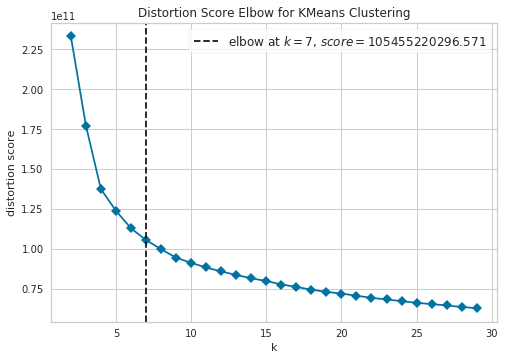

In [22]:
# find the number of cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric='distortion', timings=False)
visualizer.fit(dataset_all[dataset_all.columns.values[:-1]])
visualizer.show()

## Q2.3

In [23]:
n = visualizer.elbow_value_

cc = kmean(dataset_all[dataset_all.columns.values[:-1]])
cc.fit(n)

ourmodel = KMeans(n_clusters=n)
ourmodel.fit(dataset_all[dataset_all.columns.values[:-1]])
cluster = ourmodel.predict(dataset_all[dataset_all.columns.values[:-1]])


## Q2.4

In [24]:
len(dataset["track_publisher"].unique())

58

In [25]:
def table(n_cluster, var, principalDf):
    km = kmean(principalDf[principalDf.columns.values[:-1]])
    lg = dataset[var].unique()
    km.fit(n_cluster)
    ass = np.zeros((len(lg),n_cluster))
    for i,l in enumerate(lg):
        for y in range(n_cluster):
            if (l == dataset[dataset["track_id"] == principalDf.loc[y, :]["track_id"]][var].values):
                ass[i][km.assig[y]] += 1
    for i in range(n_cluster):
        ass[:,i] /= sum(ass[:,i])
        ass[:,i] *= 100
    return ass

In [26]:
dataset[dataset["track_id"] == dataset_all.loc[100, :]["track_id"]]['track_publisher'].values

array(['Cherry Red Music (UK)'], dtype=object)

In [28]:
km = kmean(dataset_all[dataset_all.columns.values[:-1]])
lg = dataset['track_publisher'].unique()
km.fit(len(lg))
for l in lg:
    ass = np.zeros(len(lg))
    for y in range(len(lg)):
        if (l == dataset[dataset["track_id"] == dataset_all.loc[y, :]["track_id"]]['track_publisher'].values):
            ass[km.assig[y]] += 1
    print(l, ass)